# 11wk:

최규빈  
2023-11-14

In [325]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.tree
import sklearn.ensemble

# 1. Tree와 관련된 옵션

## random state

In [326]:
df_train = pd.DataFrame({
    'X1':[-0.609,  0.240,  0.605,  0.685,  0.739,  1.605],
    'X2':[ 1.   ,  1.   ,  1.   ,  0.   ,  0.   ,  0.   ],
    'y':[1., 1., 1., 2., 2., 2.]
})

In [327]:
X = df_train[['X1','X2']]
y = df_train['y']

In [328]:
predictr = sklearn.tree.DecisionTreeRegressor()
predictr.fit(X,y)

## max_feature

In [329]:
np.random.seed(42)
data = np.array(['male'] * 500 + ['female'] * 500)
def sample_data(data, male_prob, female_prob, size):
    male_sample = np.random.choice(data[data=='male'], size=int(size * male_prob))
    female_sample = np.random.choice(data[data=='female'], size=int(size * female_prob))
    return np.concatenate([male_sample, female_sample])
train = sample_data(data, 0.8, 0.2, 280)
test = sample_data(data, 0.2, 0.8, 120)
np.random.shuffle(train)
np.random.shuffle(test)
sex = np.concatenate([train,test])
weight = np.random.randn(400)*7
height = np.random.randn(400)*3
for i,s in enumerate(sex):
    if s =='male':
        weight[i] = 75+weight[i]
        height[i] = height[i]+0.8*weight[i]+120
    else:
        weight[i] = 50+weight[i]*0.6
        height[i] = height[i]+1.3*weight[i]+100
df = pd.DataFrame({'weight':weight,'sex':sex,'height':height})
df_train, df_test = sklearn.model_selection.train_test_split(df,test_size=120)

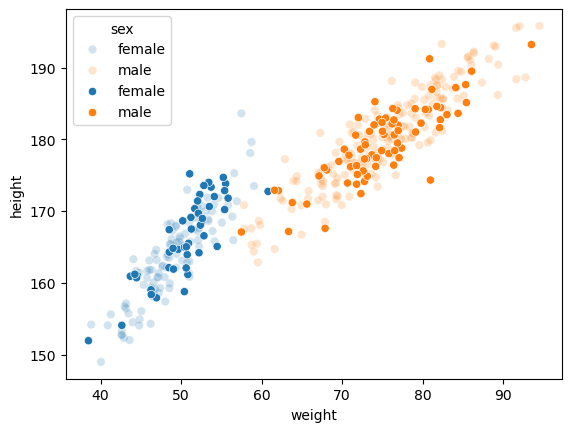

In [345]:
sns.scatterplot(df_train,x='weight',y='height',hue='sex',marker='o',alpha=0.2)
sns.scatterplot(df_test,x='weight',y='height',hue='sex',marker='o')

In [396]:
X = pd.get_dummies(df_train)[['weight','sex_female','sex_male']] # drop_first 를 하는게 더 좋긴한데요, 설명을 위해서..
y = df_train['height']

In [429]:
predictr = sklearn.ensemble.RandomForestRegressor(max_features=1)

In [430]:
predictr.fit(X,y)

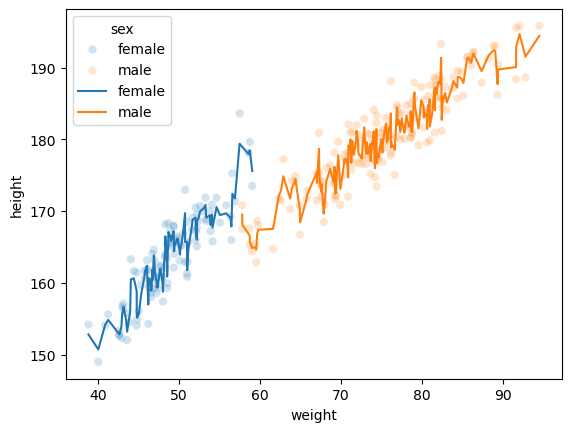

In [431]:
sns.scatterplot(df_train,x='weight',y='height',hue='sex',marker='o',alpha=0.2)
sns.lineplot(df_train,x='weight',y=predictr.predict(X),hue='sex')

# 2. 시각화

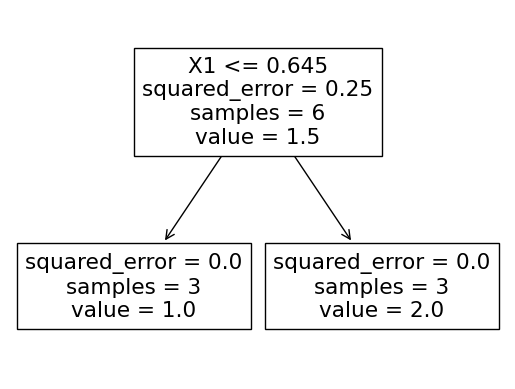

In [307]:
sklearn.tree.plot_tree(
    predictr,
    feature_names= ['X1','X2'] 
)
fig = plt.gcf()

In [311]:
fig.suptitle("Decision_Tree_Result",size=20)

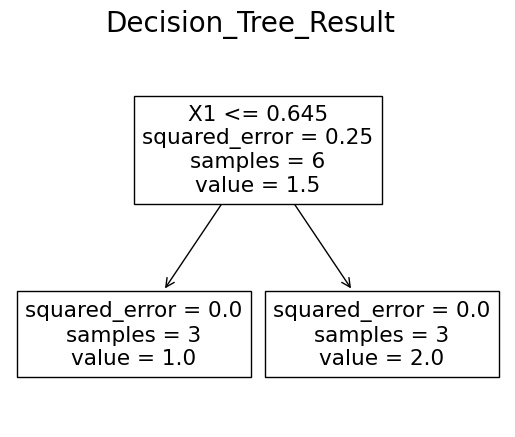

In [312]:
fig

In [313]:
fig.get_dpi()

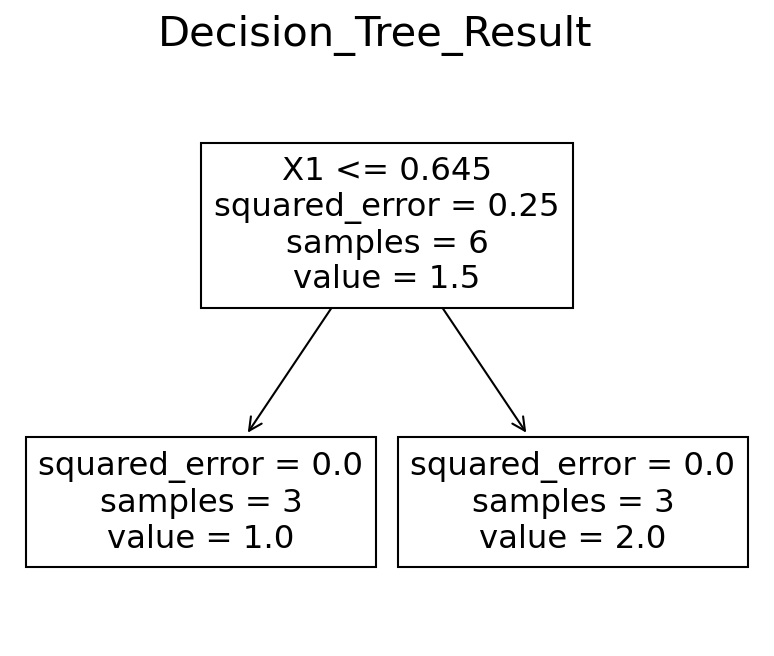

In [315]:
fig.set_dpi(150)
fig

# 2. 배깅

In [316]:
np.random.seed(43052)
temp = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/temp.csv').iloc[:,3].to_numpy()[:100]
temp.sort()
eps = np.random.randn(100)*3 # 오차
icecream_sales = 20 + temp * 2.5 + eps 
df_train = pd.DataFrame({'temp':temp,'sales':icecream_sales})
df_train

In [317]:
## step1
X = df_train[['temp']]
y = df_train['sales']
## step2
predictr = sklearn.ensemble.BaggingRegressor() 
## step3 
predictr.fit(X,y) 
## step4 -- pass 
# predictr.predict(X) 

In [207]:
trees = predictr.estimators_

In [208]:
samples = predictr.estimators_samples_

In [209]:
trees[1].predict(X)

/home/cgb2/anaconda3/envs/ag/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names

In [210]:
samples[0]

In [211]:
pre = sklearn.tree.DecisionTreeRegressor()
pre.fit(np.array(X)[samples[1]],np.array(y)[samples[1]])

In [212]:
pre.predict(X)

/home/cgb2/anaconda3/envs/ag/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names

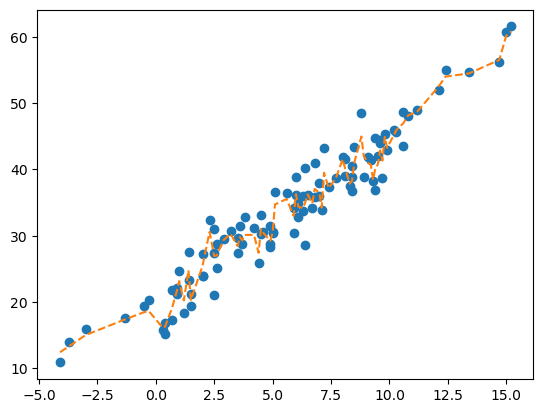

In [213]:
plt.plot(X,y,'o')
plt.plot(X,predictr.predict(X),'--')

# 4. 랜덤포레스트

In [241]:
predictr = sklearn.ensemble.RandomForestRegressor()

In [243]:
X,y

In [242]:
predictr.fit(X,y)

# 5. 부스팅

In [259]:
predictr = sklearn.ensemble.GradientBoostingRegressor() 

In [260]:
X,y

In [262]:
predictr.fit(X,y)

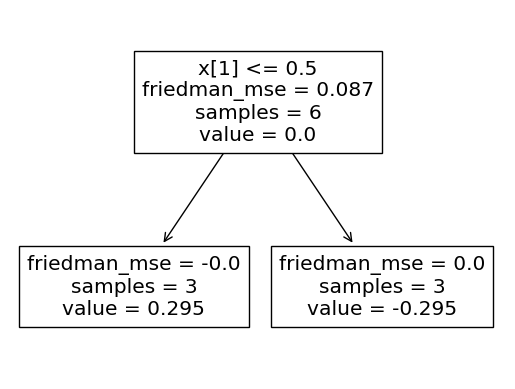

In [291]:
sklearn.tree.plot_tree(predictr.estimators_[5][0])